In [24]:
import os
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt


In [3]:
path = os.getcwd()
df = pd.read_csv(path+'\data\cleaned_data.csv')
df = df.drop(df.columns[0],axis=1)
df.head(5)

,from_address,to_address,value,from_address_type,to_address_type
0,0x318072374ffa96e8867138cd05c3be282f85f405,0x11111112542d85b3ef69ae05771c2dccff4faa26,8.0,EOA,Contract
1,0x1e7f8de390b95f960d71fbfc42f3d91021fff7ad,0xb9665650e0de599c2fafbfe98cf160399f8a23ba,14.0,EOA,EOA
2,0x53f2736fae551c998d4e72e519f1acf474264de4,0x4dbd4fc535ac27206064b68ffcf827b0a60bab3f,7.0,EOA,Contract
3,0x318072374ffa96e8867138cd05c3be282f85f405,0x11111112542d85b3ef69ae05771c2dccff4faa26,8.0,EOA,Contract
4,0x9a429a5091fb9e00ec7185fa96494765d98f6d3f,0xe592427a0aece92de3edee1f18e0157c05861564,10.0,EOA,Contract


In [7]:
df.describe(include='all')

,from_address,to_address,value,from_address_type,to_address_type
count,20000,20000,20000.000000,20000,20000
unique,10219,6053,NaN,1,2
top,0xc098b2a3aa256d2140208c3de6543aaef5cd3a94,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,NaN,EOA,Contract
freq,285,1562,NaN,20000,10000
mean,NaN,NaN,122.502348,NaN,NaN
std,NaN,NaN,2729.266553,NaN,NaN
min,NaN,NaN,1.250000,NaN,NaN
25%,NaN,NaN,3.600000,NaN,NaN
50%,NaN,NaN,7.024307,NaN,NaN
75%,NaN,NaN,20.247867,NaN,NaN


In [8]:
userSpace = df[(df.from_address_type == 'EOA') & (df.to_address_type == 'EOA')]
# contractSpace = df[(df.from_address_type == 'Contract') & (df.to_address_type == 'Contract')]
bipartiteSpace = df[((df.from_address_type == 'EOA') & (df.to_address_type == 'Contract')) | ((df.from_address_type == 'Contract') & (df.to_address_type == 'EOA'))]

In [18]:
userSpace = userSpace[['from_address','to_address','value']]
userSpace[userSpace.from_address == userSpace.to_address]

,from_address,to_address,value
2994,0x32c5f117f8722c77de8c89f98e8a2a8cea7bc1a6,0x32c5f117f8722c77de8c89f98e8a2a8cea7bc1a6,27.507501
5112,0x1729f93e3c3c74b503b8130516984ced70bf47d9,0x1729f93e3c3c74b503b8130516984ced70bf47d9,101.000000
15967,0xb66190f67ed8f0ca790ddfe541ee1bd0da53fe70,0xb66190f67ed8f0ca790ddfe541ee1bd0da53fe70,66.400000
16010,0xf957fad3963fd703e63faddaf95d30fe201043a9,0xf957fad3963fd703e63faddaf95d30fe201043a9,6.950000
17090,0x5314003b211ab223d65258015a198dec4067936b,0x5314003b211ab223d65258015a198dec4067936b,5.000000


In [27]:
G = nx.from_pandas_edgelist(userSpace,source='from_address',target='to_address',edge_attr='value')
nx.info(G)

'Graph with 7445 nodes and 8335 edges'

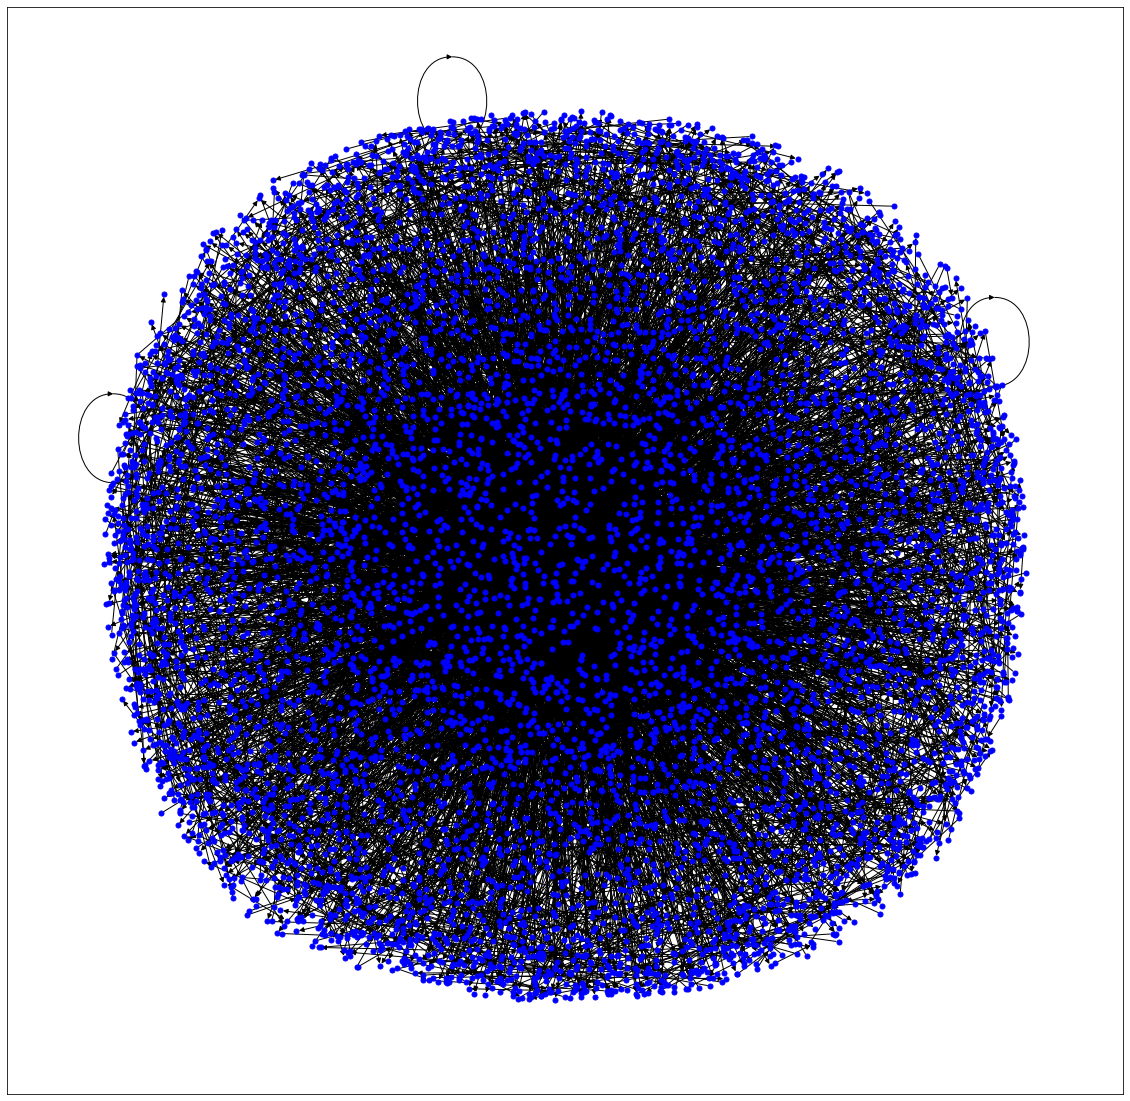

In [30]:
plt.figure(figsize=(20, 20))
pos=nx.spring_layout(G, k=0.15)
nx.draw_networkx(G,pos,arrows=True,node_size=25, node_color='blue', with_labels=False)
plt.show()